In [2]:
import numpy as np
rg=np.random.default_rng(2)
a=rg.random((2,3))
print(a)


[[0.26161213 0.29849114 0.81422574]
 [0.09191594 0.60010053 0.72856053]]


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data=pd.read_csv("housing.csv",names=column_names,delimiter=r"\s+")#r"\s+" means split and arrange the data wherever theres tabs, space 
print(data.head())
print(data.shape)
print(data.dtypes)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


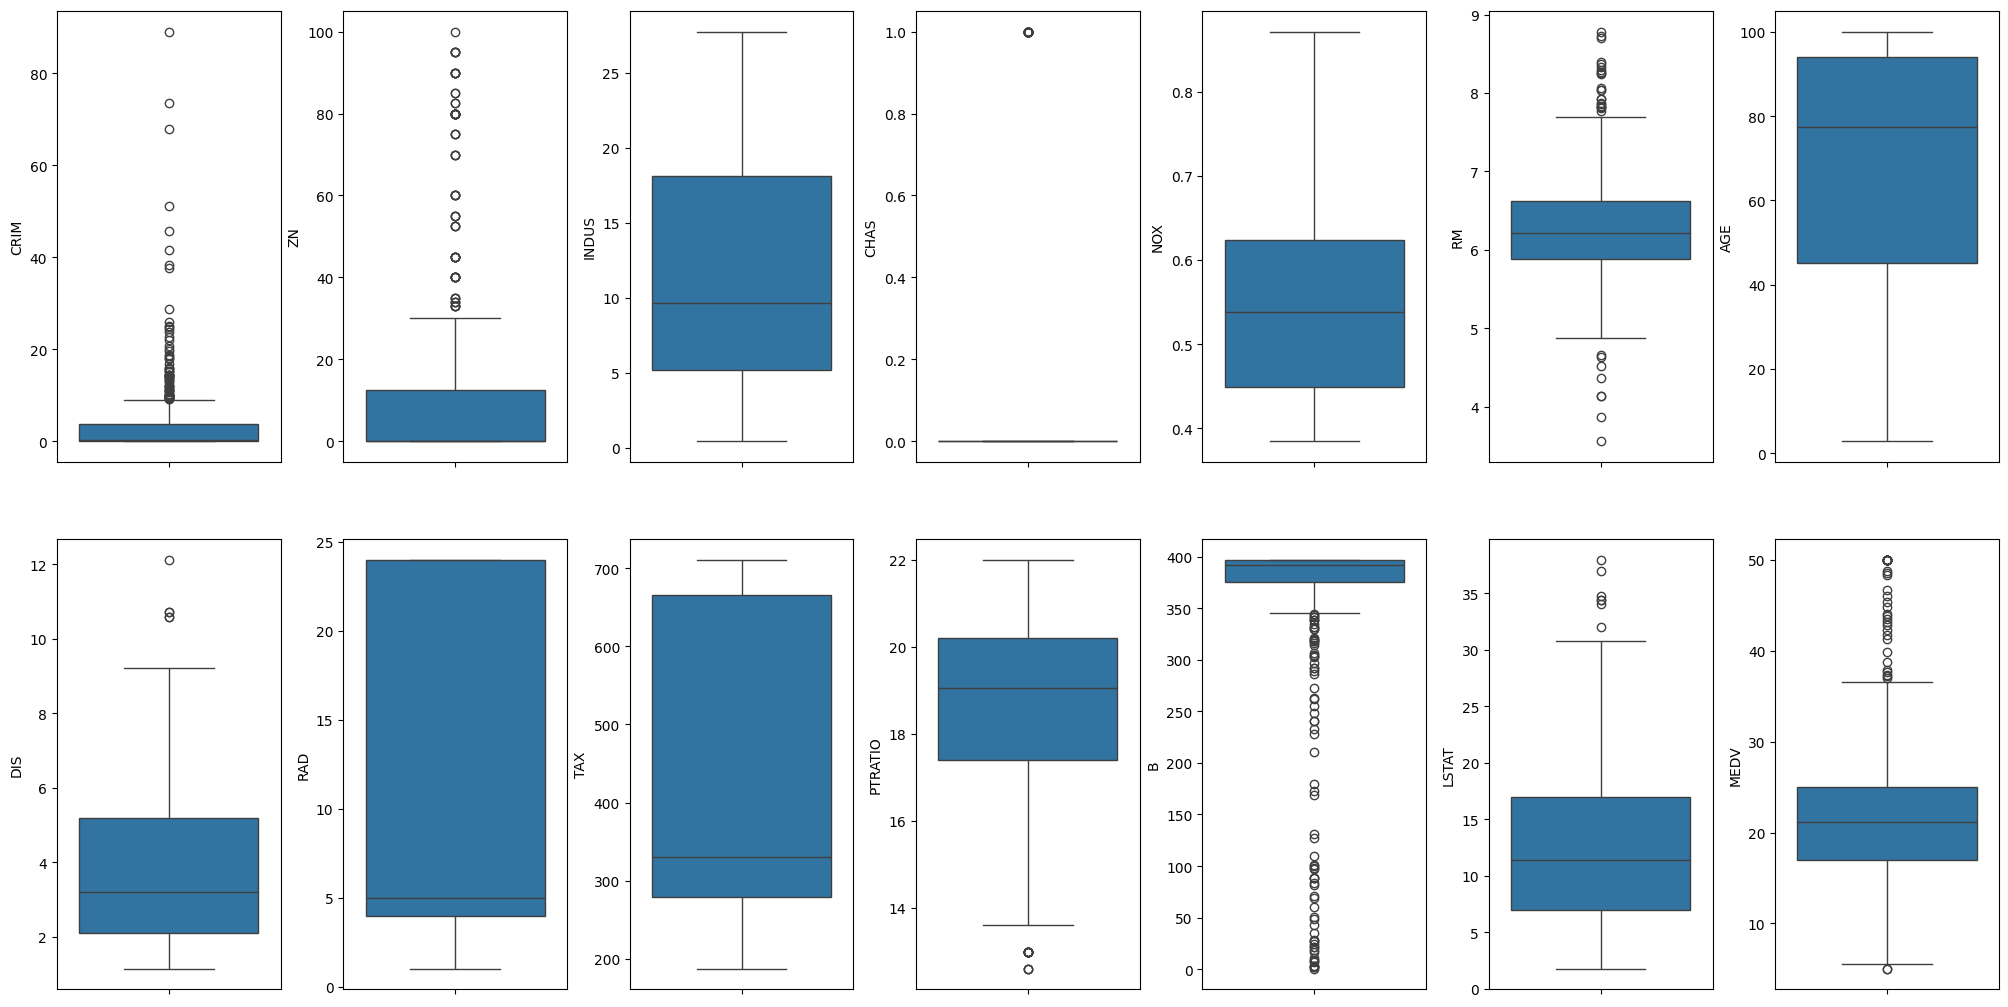

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
fig,axs=plt.subplots(ncols=7,nrows=2, figsize=(20,10))
index=0
axs=axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k,data=data,ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)#observation of the data spreadings


In [4]:
for k,v in data.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    iqr=q3-q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]#takes the data inside the upper and lower threshold (outliers gone)
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))



Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


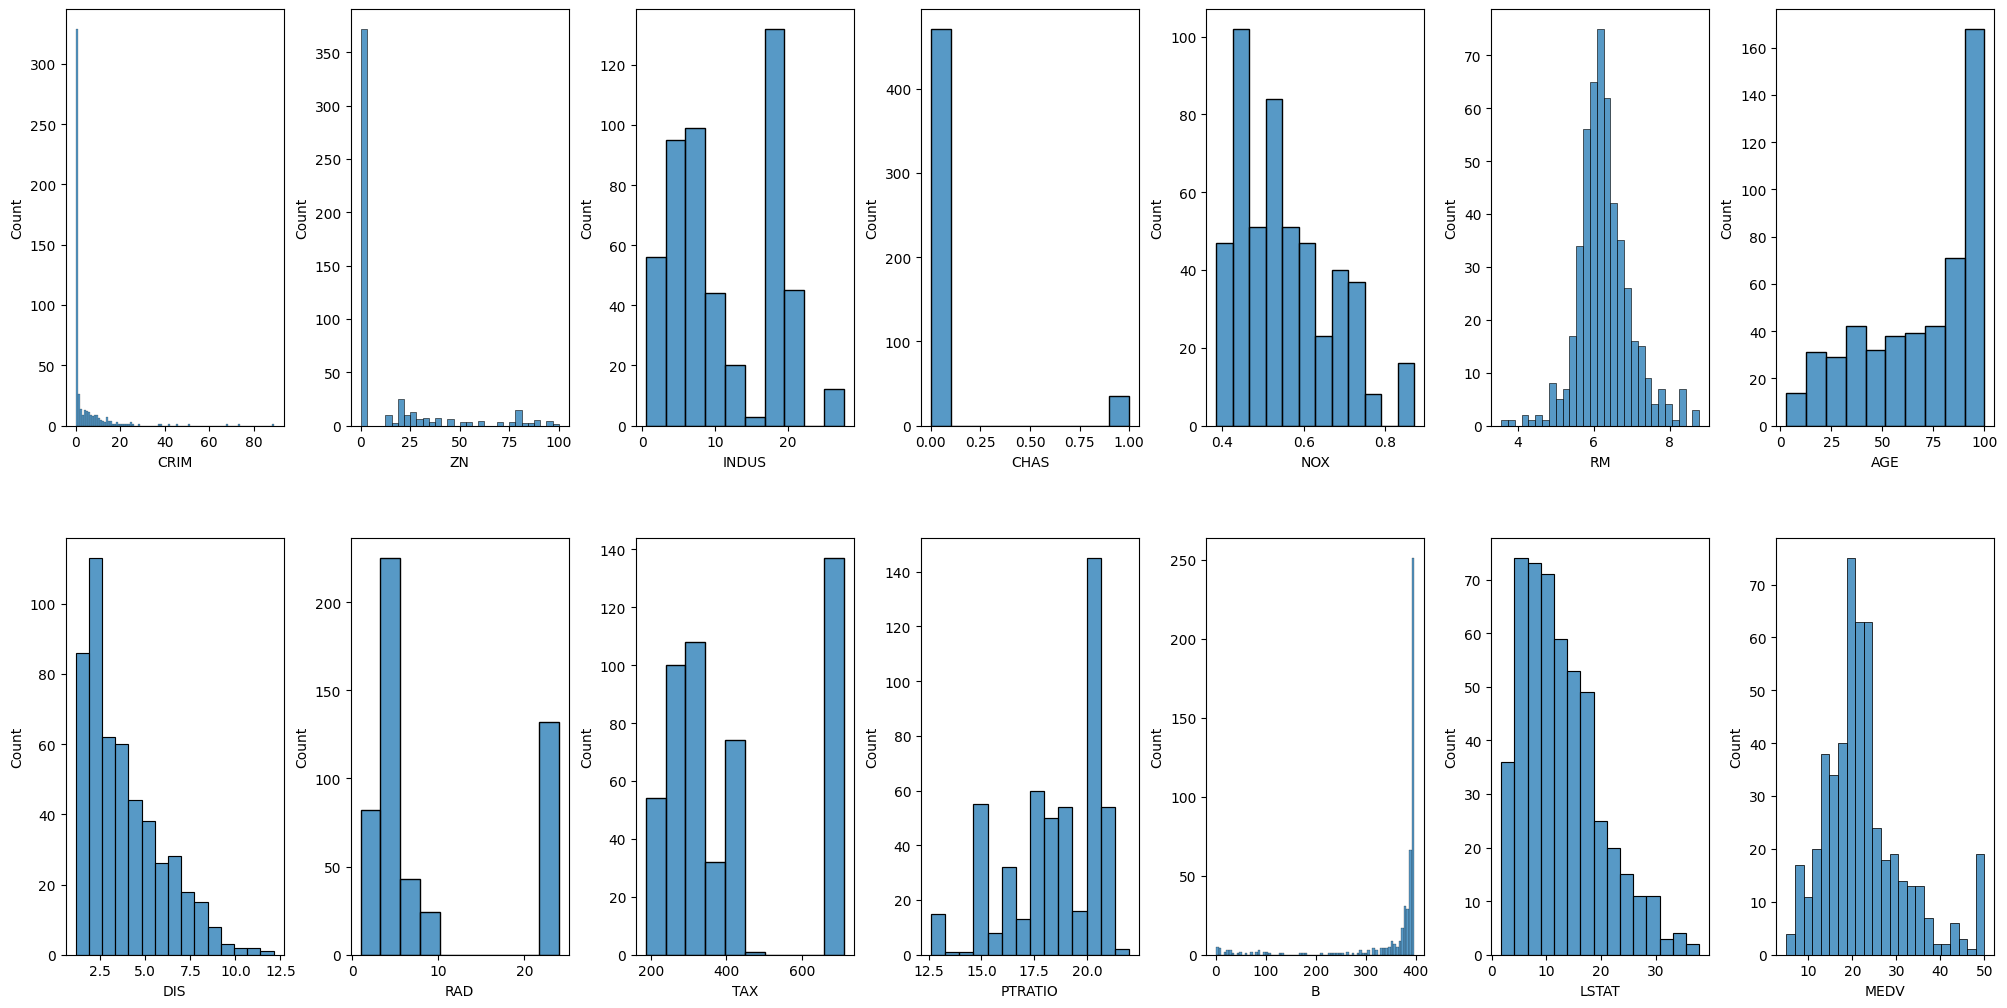

In [5]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v,ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)#histogram for the data


In [6]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))#removal of the outliers of the target function bc sometimes the house may be unusually expensive

(490, 14)


<Axes: >

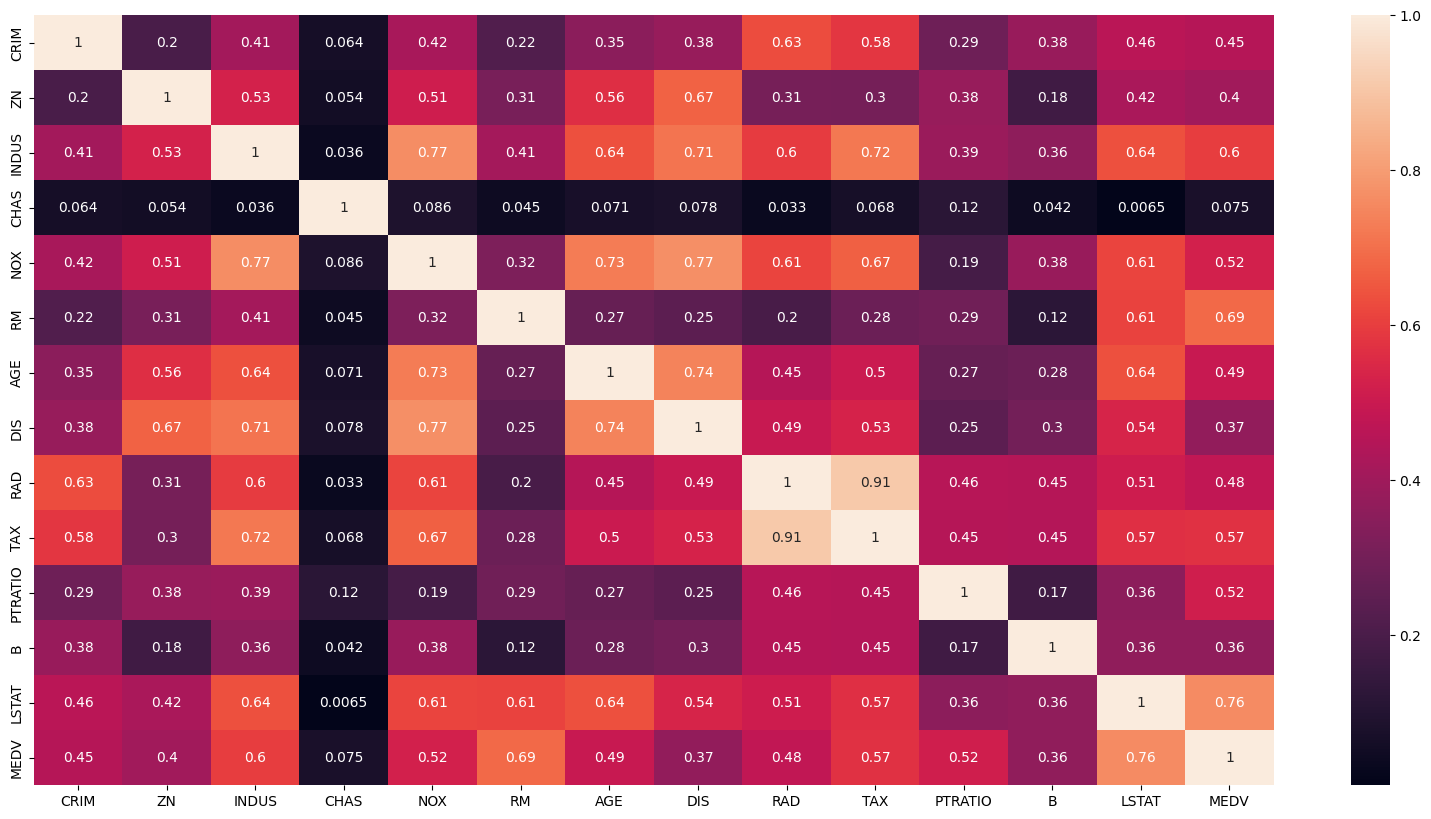

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)#.abs() to only get the value above 0 bc corr is range(-1 to 1)

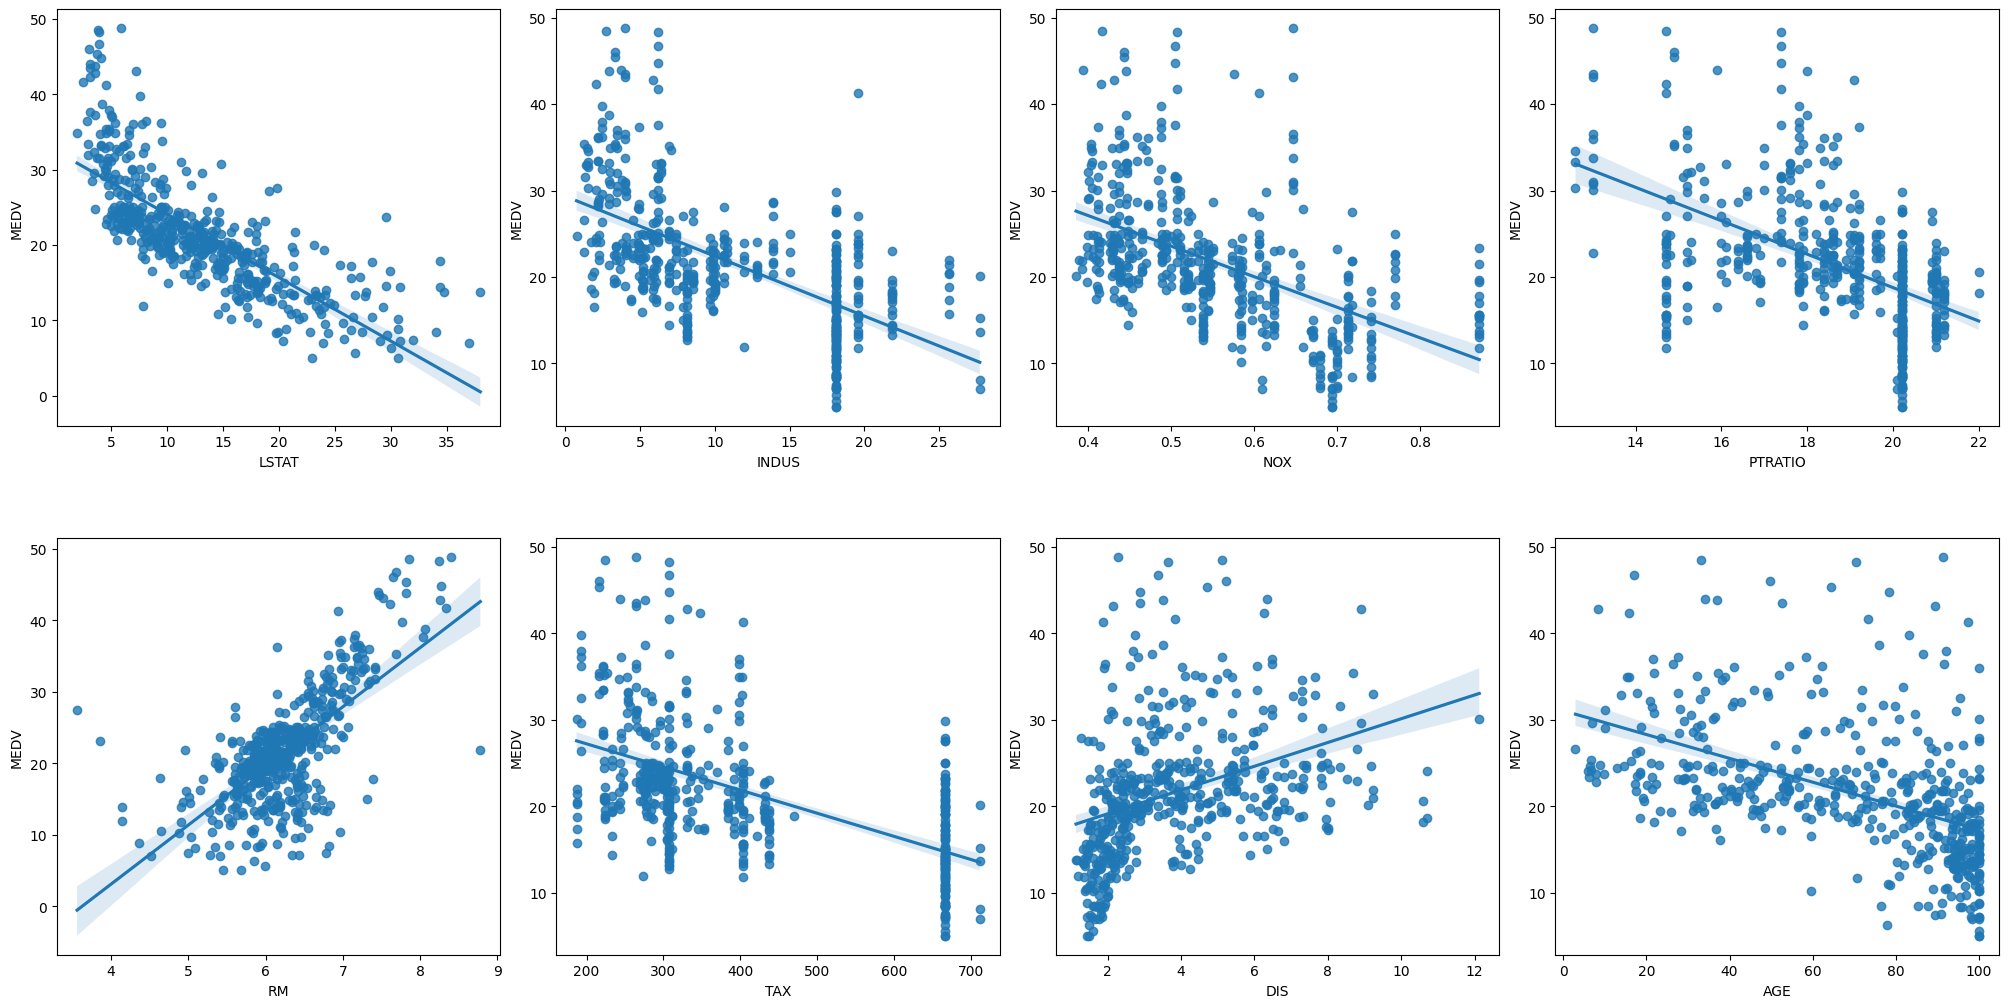

In [8]:
from sklearn import preprocessing
#compare each feat with the target feature i.e MEDV
min_max_scaler=preprocessing.MinMaxScaler()
column_sels=['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]#to remove the name of the name of features as loc accesses the row and columns
y=data['MEDV']
X=pd.DataFrame(data=min_max_scaler.fit_transform(x),columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [9]:
l_y=np.log1p(y)
for  col in x.columns:#iterate through all x cols for skewness search
    if np.abs(x[col].skew() > 0.3):#threshold is 0.3 for skewness of column
        x[col]=np.log1p(x[col])#reduce skewness by implementing log trans (add 1 for convinience)
        




In [10]:
from sklearn import linear_model,datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
l_regr=linear_model.LinearRegression()
Kf=KFold(n_splits=10)#does cross vali
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
scores=cross_val_score(l_regr,x_scaled,y,cv=Kf,scoring="neg_mean_squared_error")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
scores_map={}
scores_map["LinearRegression"]=scores

MSE: -18.38 (+/- 14.03)


In [11]:

l_ridge=linear_model.Ridge()
scores=cross_val_score(l_ridge,x_scaled,y,cv=Kf,scoring="neg_mean_squared_error")
scores_map["Ridge"]=scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -17.21 (+/- 10.63)


In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
for degree in range(2, 6):
   model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
   scores = cross_val_score(model, x_scaled, y, cv=Kf, scoring='neg_mean_squared_error')
   print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
   #leave the degree selection logic for tmrw
   model=make_pipeline(PolynomialFeatures(degree=3),linear_model.Ridge())
   scores=cross_val_score(model,x_scaled,y,cv=Kf,scoring="neg_mean_squared_error")
   print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


      
   

MSE: -13.83 (+/- 8.04)
MSE: -12.46 (+/- 6.58)
MSE: -12.46 (+/- 6.58)
MSE: -12.46 (+/- 6.58)
MSE: -12.55 (+/- 7.17)
MSE: -12.46 (+/- 6.58)
MSE: -12.75 (+/- 7.98)
MSE: -12.46 (+/- 6.58)


In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) #rbf changes the dimensional_space of the data to find pattern
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=Kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -11.63 (+/- 6.67)


In [14]:
from sklearn.tree import DecisionTreeRegressor
desc_tr=DecisionTreeRegressor(max_depth=5)
scores=cross_val_score(desc_tr,x_scaled,y,cv=Kf,scoring="neg_mean_squared_error")
scores_map[DecisionTreeRegressor]=scores
print("MSE : %0.2f(+/- %0.2f )" % (scores.mean(),scores.std()))


MSE : -17.42(+/- 5.92 )


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=7)
scores=cross_val_score(knn,x_scaled,y,cv=Kf,scoring="neg_mean_sqaured_error")
scores_map["KNeighborsRegressor"]=scores#acts as a container for having scores of different algo for ensemble to select
print("MSE : %0.2f (+/- %0.2f ) " %(scores.mean(),scores.std()))

InvalidParameterError: The 'scoring' parameter of cross_val_score must be a str among {'matthews_corrcoef', 'homogeneity_score', 'f1_micro', 'jaccard', 'adjusted_rand_score', 'neg_negative_likelihood_ratio', 'accuracy', 'balanced_accuracy', 'positive_likelihood_ratio', 'jaccard_macro', 'roc_auc_ovo_weighted', 'precision_weighted', 'f1', 'rand_score', 'neg_root_mean_squared_error', 'jaccard_weighted', 'mutual_info_score', 'neg_mean_gamma_deviance', 'recall_micro', 'roc_auc_ovr', 'neg_brier_score', 'fowlkes_mallows_score', 'recall', 'neg_mean_poisson_deviance', 'jaccard_samples', 'explained_variance', 'neg_mean_squared_log_error', 'precision', 'd2_absolute_error_score', 'precision_samples', 'f1_macro', 'recall_weighted', 'normalized_mutual_info_score', 'neg_mean_absolute_percentage_error', 'r2', 'top_k_accuracy', 'v_measure_score', 'completeness_score', 'neg_root_mean_squared_log_error', 'recall_samples', 'max_error', 'neg_mean_absolute_error', 'f1_samples', 'recall_macro', 'jaccard_micro', 'roc_auc', 'neg_log_loss', 'roc_auc_ovo', 'neg_median_absolute_error', 'f1_weighted', 'roc_auc_ovr_weighted', 'precision_macro', 'neg_mean_squared_error', 'average_precision', 'precision_micro', 'adjusted_mutual_info_score'}, a callable or None. Got 'neg_mean_sqaured_error' instead.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
scores=cross_val_score(grb,x_scaled,y,cv=Kf,scoring="neg_mean_squared_error")
scores_map["GradientBoostingRegressor"]=scores
print("MSE : %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()))


In [ ]:
#now finally the display 
plt.figure(figsize=(20,10))
scores_map=pd.DataFrame(scores_map)#all the scores of algo are in scores_map 
sns.boxplot(data=scores_map)
